# Kalorimetrie Laborversuch

Author: Dennis Dibbern

Datum: 08.12.2023

Gruppe: 31

## Forschungsfrage

Wie exakt können Wärmekapazitäten von verschiedenen Materialien mithilfe eines professionellen Laborversuches bestimmt werden?

## Versuchsaufbau und Durchführung

Der Versuchsaufbau besteht aus folgenden verschiedenen Komponenten: Rechts befindet sich ein mit Wasser gefüllter Topf, in dem mithilfe des Garers eine konstante Temperatur gehalten wird. Links daneben steht ein Becherglas, welches mit Wasser gefüllt wird und mit einem Magnetrührer durchmischt werden kann. Mit insgesamt fünf Temperatursensoren wird die Temperatur im Topf, der Umgebung und im Becherglas gemessen.

Zur Bestimmung der Kalorimeterkonstante des Versuchsaufbaus werden mithilfe eines Tauchsieders 400 ml Wasser aufgeheizt und der Temperaturanstieg gemessen.

Zur Bestimmung der einzelnen Wärmekapazitäten werden zunächst die Proben in den Topf gelegt und durchgewärmt. Anschließend werden sie in das mit Wasser gefüllte Becherglas gestellt und die Temperaturen gemessen, bis sich die Temperatur im Becherglas nicht mehr verändert. 


![Bild Versuchsaufbau](figures/Versuchsaufbau.jpg)


## Versuchsauswertung

Anmerkung: Da viele Variablen wie bspw. data_dict und std_mean_calorimeter mehrfach vorkommen (einmal pro Probe) ist es wichtig, das Skript chronologisch von oben bis unten zu runnen, und nicht zwischendrin zu beginnen. Die Variablen waren so vorgegeben.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = ('data/Messung Kalorimeterkonstante/Messung Kalorimeterkonstante.h5')

# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, 'RawData')
#print(len(data_dict['time step'][0]))
# DONE #

In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter_dict = {}

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_environment][0]

data = [mean_std_calorimeter, mean_std_environment]
time = [time_calorimeter, time_environment]

#print(data)
#print(time)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

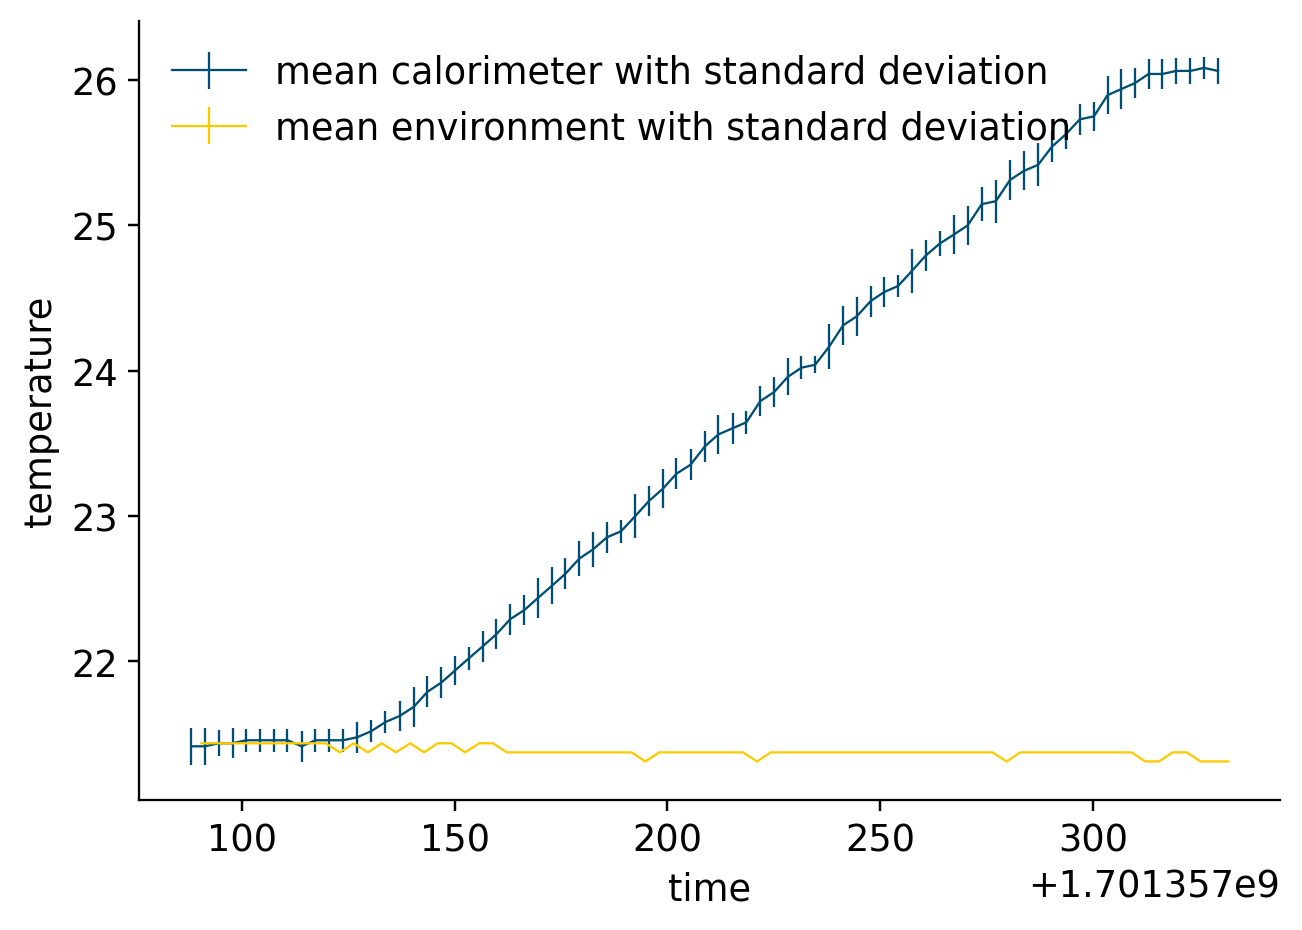

In [7]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [8]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.
path_data = 'datasheets'
water_mass = (m_json.get_json_entry(path_data,"1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753",["calorimeter","medium","mass", "value"]))
print(water_mass)
# DONE #

400


In [9]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
path_hdf5 = 'data/Messung Kalorimeterkonstante/Messung Kalorimeterkonstante.h5'
f = h5.File(path_hdf5, 'r')
#print(list(f.keys()))
g = f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd"]      # uuid der Stromversorgung des immersion_heaters
#print(list(g.keys()))
current = g["current"][()]
heat_time = g["heat_time"][()]
voltage = g["voltage"][()]

print(current)
print(heat_time)
print(voltage)

# DONE #

4.0
180.0
13.0


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kaloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [10]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature'])
print(temperature_end, temperature_start)

# DONE #

25.675847457627118 21.519295302013422


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [11]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)
# DONE #

#### (Vii) Ergebnis

In [12]:
calorimeter_const

2251.8663665410063

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [13]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = ('data/Messung PCD001/Messung PCD001.h5')

# DONE #

In [14]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, 'RawData')
#print(data_dict)
# DONE #

In [15]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [16]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_env][0]
time_bath = data_dict['time step'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]
#print(data)
# DONE #

#### (iii) Daten ploten

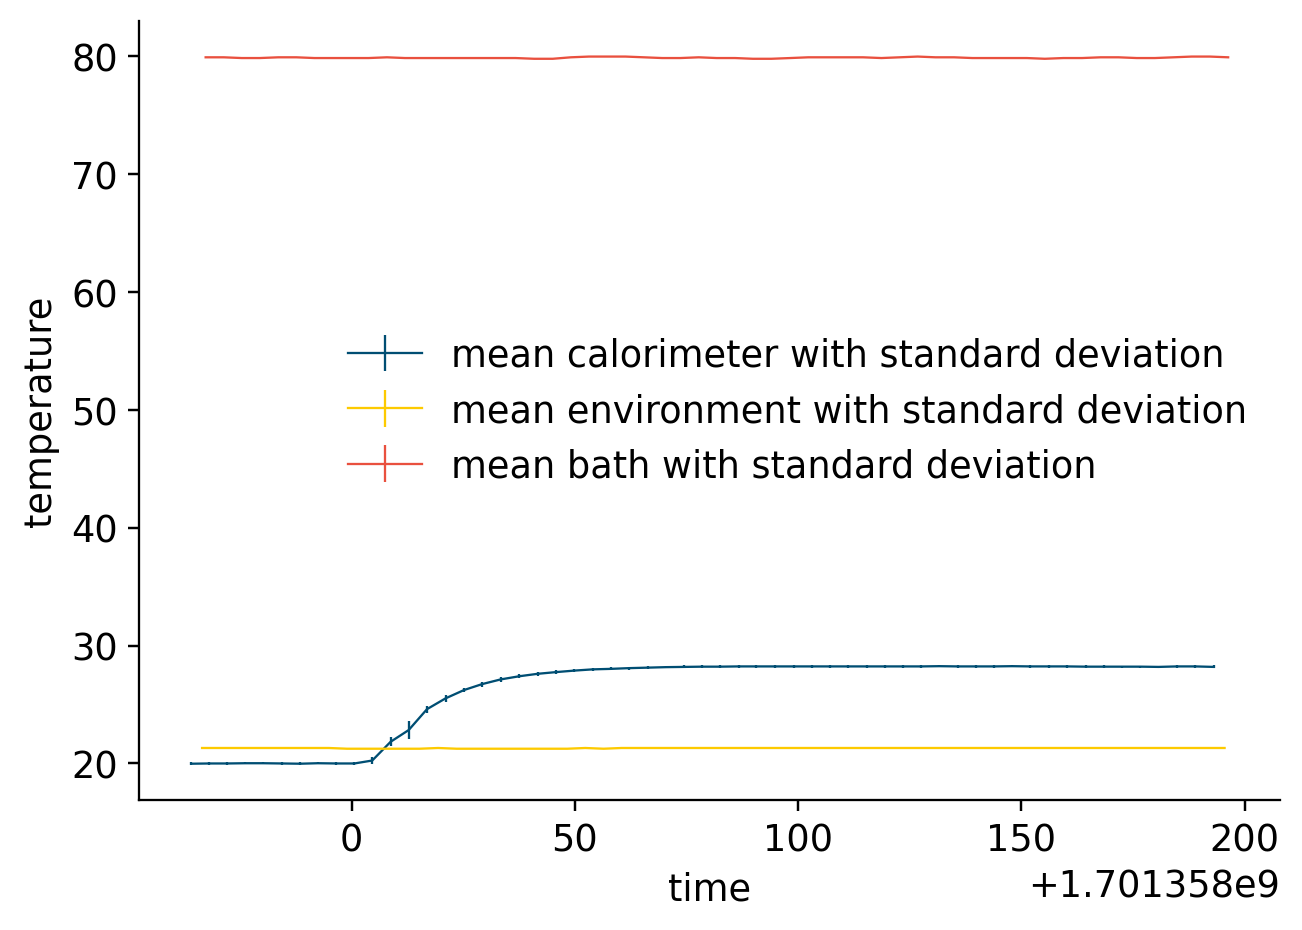

In [17]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [18]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_data = 'datasheets'
sample_mass = (m_json.get_json_entry(path_data,"1ee57b26-cc42-6a6e-b609-c4f6b4a81128",["probe", "mass", "value"]))
print(sample_mass)

# DONE #

631


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [19]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])
print(temperature_mix, temperature_start_water)

# DONE #

28.1203125 20.02462121212121


In [20]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)

# DONE #

79.8375


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [21]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [22]:
sample_heat_capa

0.5586403423378667

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [23]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = ('data/Messung PCD016/Messung PCD016.h5')

# DONE #

In [24]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2, 'RawData')

# DONE #

In [25]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [26]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_env][0]
time_bath = data_dict['time step'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]

# DONE #

#### (iii) Daten ploten

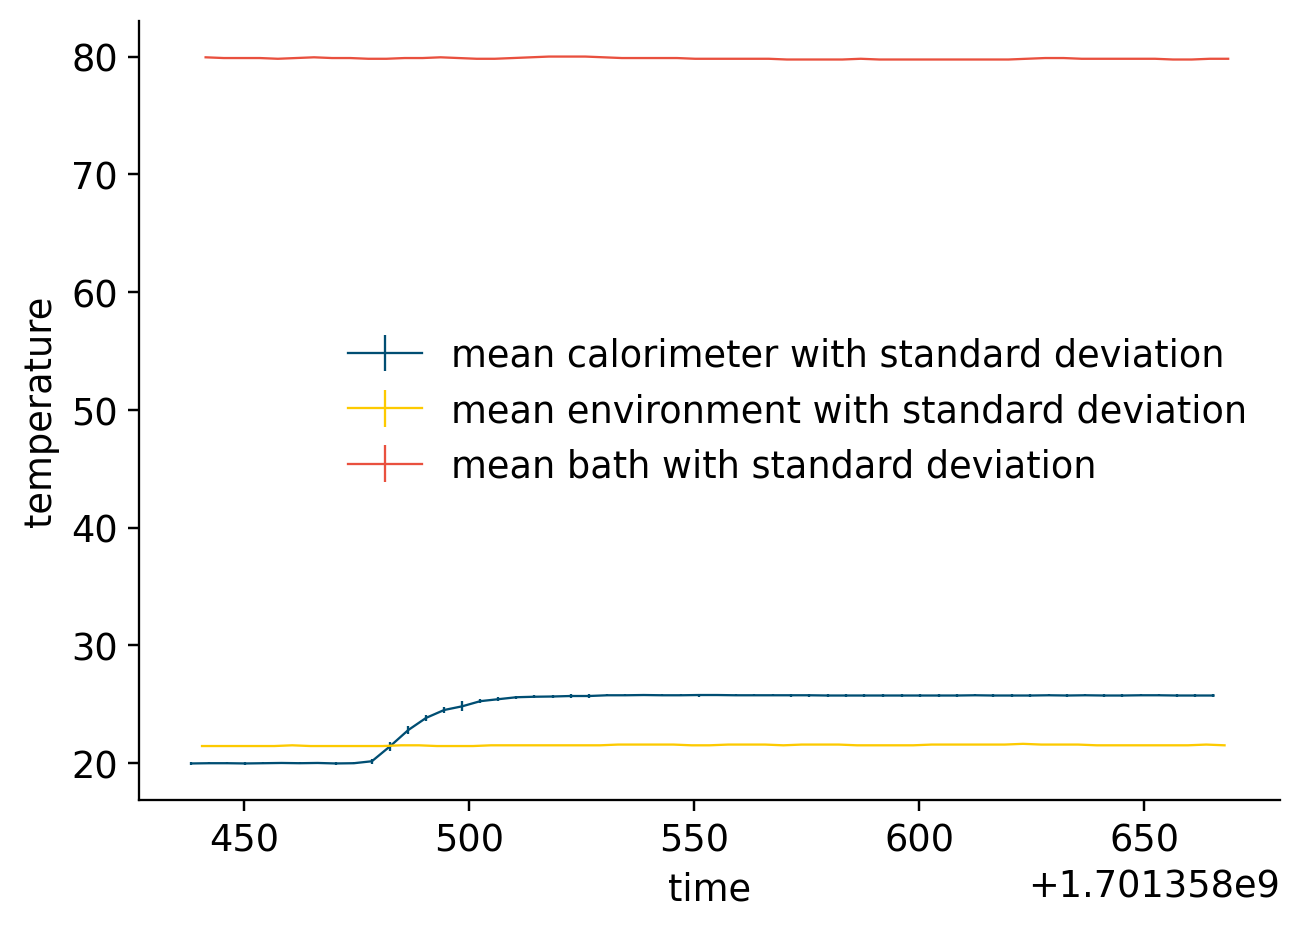

In [27]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [28]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_data = 'datasheets'
sample_mass = (m_json.get_json_entry(path_data,"1ee57b3c-b98a-64f2-aea5-ac942cc2bc1b",["probe", "mass", "value"]))
print(sample_mass)

# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur

In [29]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

#temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][0:2])

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])

print(temperature_mix, temperature_start_water)

# DONE #

25.692956349206348 19.992424242424242


In [30]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)


# DONE #

79.875


#### (vi) spezifische Wärmekapazität bestimmen

In [31]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [32]:
sample_heat_capa

1.0483207678677693

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [33]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = ('data/Messung PDC029/Messung PDC029.h5')

# DONE #

In [34]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, 'RawData')

# DONE #

In [35]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [36]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['time step'][index_calorimeter][0]
time_environment = data_dict['time step'][index_env][0]
time_bath = data_dict['time step'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]
# DONE #

#### (iii) Daten ploten

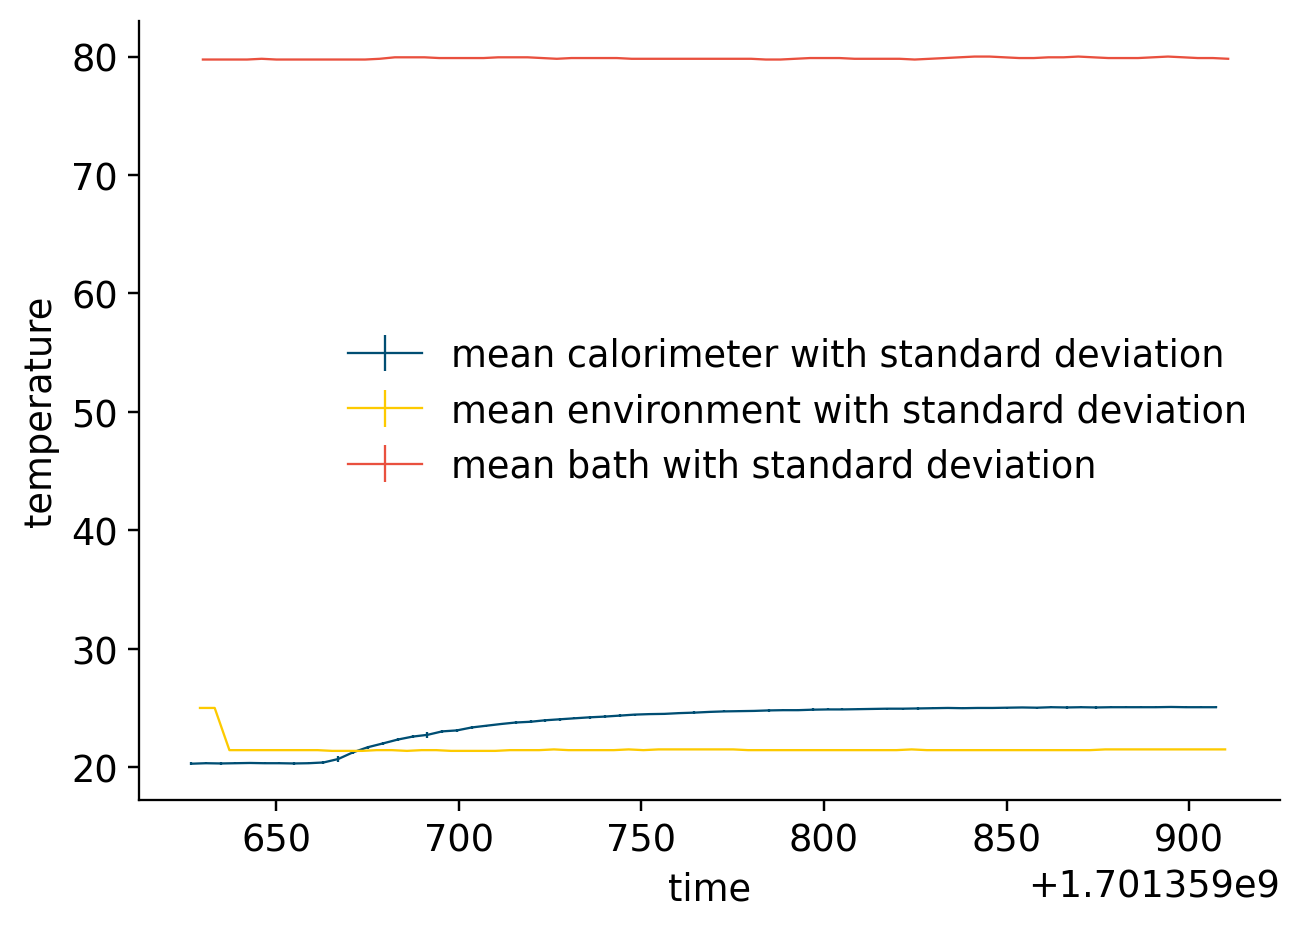

In [37]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [38]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_data = 'datasheets'
sample_mass = (m_json.get_json_entry(path_data,"1ee7d44b-f497-6207-b38a-46bf9417809f",["probe", "mass", "value"]))
print(sample_mass)


# DONE #

93


#### (v) Anfangs- und Endwert der Temperatur

In [39]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])
print(temperature_mix, temperature_start_water) 

# DONE #

24.802083333333332 20.410714285714285


In [40]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)

# DONE #

79.75625


#### (vi) spezifische Wärmekapazität bestimmen

In [41]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [42]:
sample_heat_capa

1.9349020100137295

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Um zu prüfen, wie erfolgreich der Versuch war, werden die Messergebnisse mit den tatsächlichen Wärmekapazitäten der Materialien verglichen.

C_Edelstahl = 477 J/kgK, Ergebnis Versuch: 559 J/kgK

C_Alu = 888 J/kgK, Ergbebnis Versuch: 1048 J/kgK

C_Polyamid = 1,7 kJ/kgK, Ergebnis Versuch: 1,9 kJ/kgK

Damit kann man erkennen, dass die Versuchsergebnisse zwar merklich von den tatsächlichen Werten abweichen, eine klare Zuordnung der Werkstoffe anhand ihrer ermittelten Wärmekapazitäten aber problemlos möglich wäre. Damit ist das Ergebnis in Bezug auf die Forschungsfrage, dass zwar eine gute Tendenz und eine grobe Abschätzung der Wärmekapazitäten mit dem Versuch möglich ist, die Genauigkeit für eine exakte Ermittlung der Wärmekapazitäten allerdings nicht ausreicht.

Gründe für die Ungenauigkeit können die geringen Wassermengen sein, die beim Transport der Probe aus dem Heißwasserbad mitgekommen sind, wobei wir stark drauf geachtet haben, nur möglichst geringe Mengen mitzunehmen. Dieses Wasser könnte die Messung verfälschen, da die Wassermenge nun nicht mehr exakt dem Wert aus den Metadaten entspricht. 

Weitere Gründe könnten Wärmeverlust der Probe beim Transport vom Heißwasserbad zur Messung sein. Eventuell hatten die Proben somit von Beginn der Messung an an nicht genau die Temperatur wie das Heißwasserbad, was das Ergebnis verändern würde.

Ein weiterer Grund könnte auch die Messungenauigkeit der Sensoren sein. Wie man sieht, messen die drei Sensoren nicht exakt die gleichen Temperaturen und haben verschiedene Standardabweichungen, was auch Einfluss auf die Messergebnisse hat. 

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Insgesamt bin ich mit dem Versuchsergebnis zufrieden. Die Ergebnisse kommen nah an die tatsächlichen Werte ran und lassen eine Einordnung der Werkstoffe zu. Ich habe einiges zum Thema Kalorimetrie und Versuchsdurchführung gelernt und es hat Spaß gemacht, die Versuche selbst durchführen zu können.
